In [1]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns = train_df.columns.str.replace('rainfall_train.', '', regex=False)
test_df.columns = test_df.columns.str.replace('rainfall_test.', '', regex=False)

V01 : 0.1mm 이상 누적확률 / class1 : 0.1~0.19 

V02 : 0.2mm  / class2 : 0.2 ~ 0.49 

VO3 : 0.5mm / class3 : 0.5 ~ 0.99 

V04 : 1.0mm / class4 : 1.0 ~ 1.9 

V05 : 2.0mm / class5 : 2.0 ~ 4.9 

V06 : 5.0mm / class6 : 5.0 ~ 9.9 

V07 : 10.0mm / class7 : 10.0 ~ 19.9 

V08 : 20.0mm / class 8 : 20.0 ~ 29.9 

V09 : 50.0mm / class9 : 30.0 ~ 

In [4]:
check_valid = train_df.groupby(['ef_year', 'ef_month', 'ef_day', 'ef_hour','stn4contest'])['vv'].apply(list).reset_index()

In [ ]:
check_valid

In [ ]:
# 같은 시간, 같은 위치이면 실관측량 동일 확인 => True
for i in range(len(check_valid)):
    df = pd.DataFrame(check_valid['vv'][i])
    if df.values.sum()!=0:
        print(df)

: 

In [ ]:
sorted_df = train_df.sort_values(by=['stn4contest','ef_year', 'ef_month', 'ef_day', 'ef_hour'])

: 

In [ ]:
# 비가 온날
mask = sorted_df['vv'] > 0
columns = ['stn4contest','dh', 'ef_year', 'ef_month', 'ef_day', 'ef_hour', 'v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval']
rainy_df = sorted_df.loc[mask, columns]
rainy_df.describe()

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_plot = ['v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv']
# List of columns for which to draw box plots
sns.boxplot(data=rainy_df[columns_to_plot])
plt.title('rainy day')

: 

In [ ]:
# 비가 안온 날
mask = sorted_df['vv'] == 0
columns = ['stn4contest','dh', 'ef_year', 'ef_month', 'ef_day', 'ef_hour', 'v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval']
NoRain_df = sorted_df.loc[mask, columns]
NoRain_df.describe()

: 

In [ ]:
rainy_df[rainy_df['v01']<=100].describe()

: 

In [ ]:
rainy_df[rainy_df['v01']>50].describe()

: 

In [ ]:
NoRain_df[NoRain_df['v01']<=50].describe() # 비 안온날 V01 50% 이하 : 틀린경우

: 

In [ ]:
NoRain_df[NoRain_df['v01']>=50].describe() # 비 안온날 V01>50% 이상

: 

In [ ]:
train_df['dh'].mean()

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_plot = ['v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv']
# List of columns for which to draw box plots
sns.boxplot(data=NoRain_df[columns_to_plot])
plt.title('No rain day')

: 

In [ ]:
# 결측치 제거
columns = ['dh','ef_month', 'ef_day', 'ef_hour', 'v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval']
train_df.describe() # vv와 class interval에 결측치 있음 -999

: 

In [ ]:
null_df = train_df[train_df['vv']<0]
print(null_df)

: 

In [ ]:
import numpy as np
columns = ['dh', 'v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval'] # with numerical data
train_df = train_df[columns]
train_df = train_df.mask(train_df<0,np.nan) # fill -999 with NaN

: 

In [ ]:
train_df.isnull().sum()

: 

가설 1. dh가 적을 수록 확률을 잘 맞춘다

연도별,월별,일별,시간별 강수량

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns = train_df.columns.str.replace('rainfall_train.', '', regex=False)
test_df.columns = test_df.columns.str.replace('rainfall_test.', '', regex=False)
train_df = train_df[train_df['vv']>=0]

: 

In [ ]:
pivot_table = train_df.pivot_table(values='vv', index=['ef_year', 'ef_month', 'ef_day','ef_hour'], aggfunc='mean')

: 

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=pivot_table, x='ef_year', y='vv', hue = 'ef_year', palette='viridis')
plt.xlabel('Year')
plt.ylabel('rainfall')
plt.title('avg of vv values by Year')
plt.show()


sns.barplot(data=pivot_table, x='ef_month', y='vv', hue = 'ef_month', palette='viridis')
plt.xlabel('month')
plt.ylabel('rainfall')
plt.title('avg of vv values by Month')
plt.show()


sns.barplot(data=pivot_table, x='ef_day', y='vv', hue = 'ef_day', palette='viridis')
plt.xlabel('day')
plt.ylabel('rainfall')
plt.title('avg of vv values by day')
plt.show()

sns.barplot(data=pivot_table, x='ef_hour', y='vv', hue = 'ef_hour', palette='viridis')
plt.xlabel('hour')
plt.ylabel('rainfall')
plt.title('avg of vv values by hour')
plt.show()

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['fc_month', 'fc_day', 'fc_hour','dh', 'ef_month', 'ef_day', 'ef_hour','vv', 'class_interval']
corr = train_df[columns].corr()
f,ax = plt.subplots(figsize =(15,10))
sns.heatmap(corr,vmin=-1,cmap='coolwarm',vmax=1)

: 

In [ ]:
corr

: 

In [ ]:
import pandas as pd
from scipy.stats import ttest_rel
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

: 

In [ ]:
pivot_table.reset_index(inplace=True)

: 

In [ ]:
model_month = ols('vv ~ C(ef_month)', data=pivot_table).fit()
anova_month = sm.stats.anova_lm(model_month, typ=2)
print('강수량과 ef_month ANOVA TEST : ')
print(anova_month)

: 

In [ ]:
model_day = ols('vv ~ C(ef_day)', data=pivot_table).fit()
anova_day = sm.stats.anova_lm(model_day, typ=2)
print('강수량과 ef_day ANOVA TEST : ')
print(anova_day)

: 

In [ ]:
model_hour = ols('vv ~ C(ef_hour)', data=pivot_table).fit()
anova_hour = sm.stats.anova_lm(model_hour, typ=2)
print('강수량과 ef_hour ANOVA TEST : ')
print(anova_hour)

: 

In [ ]:
pivot_table

: 

In [ ]:
pivot_table
import pandas as pd
import scipy.stats as stats

# Assuming you have a pivot table named 'pivot_table'
# with columns 'ef_year', 'ef_month', 'ef_day', 'ef_hour', and 'vv'

# Extract the values from the pivot table
data = pivot_table['vv'].values

: 

In [ ]:
# post hoc analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HSD = pairwise_tukeyhsd(pivot_table['vv'], pivot_table['ef_month'], alpha = 0.05)
HSD.summary()

: 

In [ ]:
# post hoc analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HSD = pairwise_tukeyhsd(pivot_table['vv'], pivot_table['ef_day'], alpha = 0.05)
HSD.summary()

: 

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
# Perform Tukey's HSD test
mc = MultiComparison(pivot_table['vv'], pivot_table['ef_hour'])
tukey_result = mc.tukeyhsd()

# Convert Tukey's HSD result to DataFrame
tukey_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Filter the DataFrame to show only rows where reject is True
reject_true = tukey_df[tukey_df['reject'] == True]

reject_true

: 

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
# Perform Tukey's HSD test
mc = MultiComparison(pivot_table['vv'], pivot_table['ef_day'])
tukey_result = mc.tukeyhsd()

# Convert Tukey's HSD result to DataFrame
tukey_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Filter the DataFrame to show only rows where reject is True
reject_true = tukey_df[tukey_df['reject'] == True]

reject_true

: 

In [ ]:
len(reject_true)

: 

# 결측치 제거

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns = train_df.columns.str.replace('rainfall_train.', '', regex=False)
test_df.columns = test_df.columns.str.replace('rainfall_test.', '', regex=False)

columns = ['dh', 'v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval'] # with numerical data
train_df = train_df[columns]
train_df = train_df.mask(train_df<0,np.nan) # fill -999 with NaN

: 

In [ ]:
train_df.isnull().sum()

: 

0인게 너무 많아서 다 틀림

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

NoNA_df = train_df[train_df['class_interval'].notna()]
NA_df = train_df[train_df['class_interval'].isna()]

# train_data with missing value
X = NoNA_df.drop(columns = ['vv','class_interval'])
y = NoNA_df['class_interval']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(objective='multi:softprob', num_class=3, n_estimators=100, seed=42)
model.fit(X_train,y_train)

y_val_pred = model.predict(X_val)

: 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

: 

0 class 뺴고 해보자

In [ ]:
train_df = train_df[train_df['vv']>0]
train_df.class_interval -=1

: 

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
NoNA_df = train_df[train_df['class_interval'].notna()]
NA_df = train_df[train_df['class_interval'].isna()]

# train_data with missing value
X = NoNA_df.drop(columns = ['vv','class_interval'])
y = NoNA_df['class_interval']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(objective='multi:softprob', num_class=3, n_estimators=100, seed=42)
model.fit(X_train,y_train)

y_val_pred = model.predict(X_val)

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

: 

In [ ]:
train_df

: 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_val, y_val_pred)

: 

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

: 

In [ ]:
for i in range(1,9):
    plt.figure(figsize=(10,5))
    plt.title(f'class {i}')
    sns.boxplot(train_df[train_df['class_interval']==i][columns_to_plot])

: 

In [ ]:
for i in range(10):
    print(train_df[train_df['class_interval']==i].describe())

: 

In [ ]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

outliers = train_df[(train_df['Values'] >threshold)]
print(outliers)

: 

In [ ]:
for column in train_df.columns:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[column] >threshold)]
    print(outliers)

: 

In [ ]:
class_counts = train_df['class_interval'].value_counts()
print(class_counts)

: 

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns = train_df.columns.str.replace('rainfall_train.', '', regex=False)
test_df.columns = test_df.columns.str.replace('rainfall_test.', '', regex=False)

columns = ['dh', 'v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval'] # with numerical data
train_df = train_df[columns]
train_df = train_df.mask(train_df<0,np.nan) # fill -999 with NaN

: 

In [ ]:
for i in range(1,10):
    for j in range(1,10):
        sns.histplot(train_df[train_df['class_interval'] == i][f'v0{j}'], kde=True, bins=100)
        plt.title(f'Distribution of v0{j} in Class{i}')
        plt.xlabel(f'v{0{j}}')
        plt.ylabel('Frequency')
        plt.show()

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_features(data, class_label, class_num, features, kde=True, bins=100):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(100, 100))
    for i, feature in enumerate(features):
        row = (i // 3)
        col = (i % 3)
        #axs[row, col].hist(data[data[class_label] == class_num][feature], bins=bins)
        sns.kdeplot(data[data[class_label] == class_num][feature], ax=axs[row, col])
    plt.tight_layout()
    plt.show()
for i in range(0,10):
    print(f'class interval = {i} 입니다. (0,0)~(3,3)까지 v01~v09의 분포입니다')
    plot_class_features(train_df, 'class_interval', i, [f'v0{j}' for j in range(1, 10)])
    

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_features(data, class_label, class_num, features, kde=True, bins=100):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(100, 100))
    for i, feature in enumerate(features):
        row = (i // 3)
        col = (i % 3)
        axs[row, col].hist(data[data[class_label] == class_num][feature], bins=bins)
    plt.tight_layout()
    plt.show()
for i in range(0,10):
    print(f'class interval = {i} 입니다. (0,0)~(3,3)까지 v01~v09의 분포입니다')
    plot_class_features(train_df, 'class_interval', i, [f'v0{j}' for j in range(1, 10)])

: 

In [ ]:
for j in range(1,10):
    sns.histplot(train_df[train_df['class_interval'] == 0][f'v0{j}'], kde=True, bins=100)
    plt.title(f'Distribution of v0{j} in Class 0')
    plt.ylim(0,10000)
    plt.xlabel(f'v{j}')
    plt.ylabel('Frequency')
    plt.show()

: 

# Outlier 제거

In [3]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns = train_df.columns.str.replace('rainfall_train.', '', regex=False)
test_df.columns = test_df.columns.str.replace('rainfall_test.', '', regex=False)

columns = ['dh', 'v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval'] # with numerical data
train_df = train_df[columns]
train_df = train_df.mask(train_df<0,np.nan) # fill -999 with NaN

In [4]:
class0 = train_df[train_df['class_interval']==0]
class1 = train_df[train_df['class_interval']==1]
class2 = train_df[train_df['class_interval']==2]
class3 = train_df[train_df['class_interval']==3]
class4 = train_df[train_df['class_interval']==4]
class5 = train_df[train_df['class_interval']==5]
class6 = train_df[train_df['class_interval']==6]
class7 = train_df[train_df['class_interval']==7]
class8 = train_df[train_df['class_interval']==8]
class9 = train_df[train_df['class_interval']==9]

<Axes: >

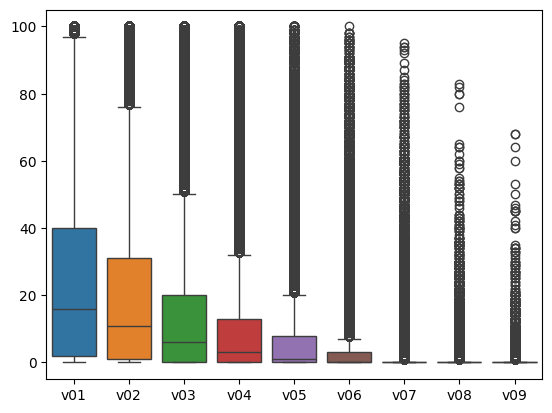

In [5]:
columns_to_plot = ['v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09']
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(class0[columns_to_plot])

In [6]:
filtered_class0 = class0[
    (class0['v01'] <= 40) &
    (class0['v02'] <= 31) &
    (class0['v03'] <= 20) &
    (class0['v04'] <= 13) &
    (class0['v05'] <= 8) &
    (class0['v06'] <= 3) &
    (class0['v07'] == 0) &
    (class0['v08'] == 0) &
    (class0['v09'] == 0)
]

<Axes: >

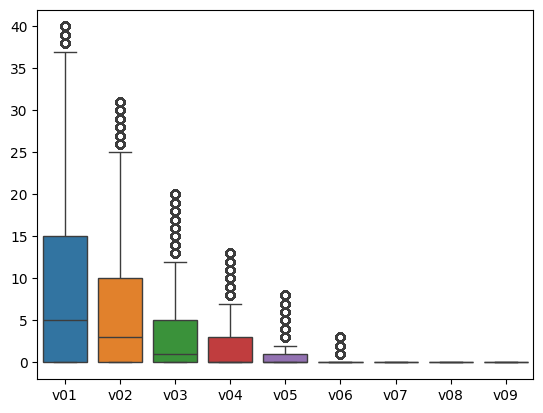

In [7]:
columns_to_plot = ['v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09']
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(filtered_class0[columns_to_plot])

In [8]:
filtered_class1 = class1[class1['v01']>0]
filtered_class2 = class2[class2['v01']>0]
filtered_class3 = class3[class3['v01']>0]
filtered_class4 = class4[class4['v01']>0]
filtered_class5 = class5[class5['v01']>0]
filtered_class6 = class6[class6['v01']>0]
filtered_class7 = class7[class7['v01']>0]
filtered_class8 = class8[class8['v01']>0]
filtered_class9 = class9[class9['v01']>0]

In [9]:
dataframes = [filtered_class0,filtered_class1,filtered_class2,filtered_class3,filtered_class4,filtered_class5,filtered_class6,filtered_class7,filtered_class8,filtered_class9]
filtered_df = pd.concat(dataframes,axis=0)

In [10]:
# train,test 
# train => SMOTE
# test => CSI

# dh별로 80개 모델 enesemble 
# 각 모델별로 SMOTE

In [11]:
filtered_df

,dh,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
0,3,0,0,0,0,0,0,0,0,0,0.0,0.0
1,6,0,0,0,0,0,0,0,0,0,0.0,0.0
2,9,0,0,0,0,0,0,0,0,0,0.0,0.0
3,12,0,0,0,0,0,0,0,0,0,0.0,0.0
4,15,0,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1452902,51,100,100,100,97,93,77,50,13,3,33.9,9.0
1452978,39,100,100,100,100,100,95,56,9,0,33.9,9.0
1453054,27,100,100,100,100,99,97,61,10,0,33.9,9.0
1453130,15,100,100,100,100,100,97,83,19,1,33.9,9.0


In [14]:
X = filtered_df.drop(['vv','class_interval'],axis=1)

In [15]:
X

,dh,v01,v02,v03,v04,v05,v06,v07,v08,v09
0,3,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0
3,12,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1452902,51,100,100,100,97,93,77,50,13,3
1452978,39,100,100,100,100,100,95,56,9,0
1453054,27,100,100,100,100,99,97,61,10,0
1453130,15,100,100,100,100,100,97,83,19,1
